In [13]:
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
%matplotlib inline

In [14]:
# Data Files
file_path = "group3_resources\SpotifyFeatures.csv"

#Load Data
orignal_df = pd.read_csv(file_path)
orignal_df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4-Apr,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4-Apr,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,4-May,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4-Apr,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4-Apr,0.390


In [15]:
orignal_df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [18]:
len(orignal_df)

232725

In [19]:
orignal_df['artist_name'].nunique()

14564

In [21]:
orignal_df['track_name'].nunique()

148608

In [23]:
orignal_df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [25]:
orignal_df['genre'].nunique()

27

In [91]:
#Are there dupicates by artist, genre and track name
group_df = orignal_df.groupby(["artist_name", "genre", "track_name"]).count()
group_df = group_df.sort_values(["track_id"], ascending=False)
group_df

track_id  \
artist_name                       genre       track_name                                                     
!!!                               Alternative Even When The Water's Cold                                 1   
Orion Sun                         Alternative Antidote                                                   1   
Orchestral Manoeuvres In The Dark Dance       If You Leave                                               1   
                                              So In Love                                                 1   
                                  Rock        Enola Gay - Remastered                                     1   
...                                                                                                    ...   
Giuseppe Verdi                    Opera       Verdi: Messa da Requiem: VI. Communion - Lux ae...         1   
                                              Verdi: Messa da Requiem: VII. Libera me, 1. Lib...         1   
                                              Verdi: Messa da Requiem: VII. Libera me, 2. Req...         1   
                                              Verdi: Messa da Requiem: VII. Libera me, 3. Lib...         1   
정진우                               R&B         I'll Find You (feat. June)                                 1   

                                                                                                  popularity  \
artist_name                       genre       track_name                                                       
!!!                               Alternative Even When The Water's Cold                                   1   
Orion Sun                         Alternative Antidote                                                     1   
Orchestral Manoeuvres In The Dark Dance       If You Leave                                                 1   
                                              So In Love                                                   1   
                                  Rock        Enola Gay - Remastered                                       1   
...                                                                                                      ...   
Giuseppe Verdi                    Opera       Verdi: Messa da Requiem: VI. Communion - Lux ae...           1   
                                              Verdi: Messa da Requiem: VII. Libera me, 1. Lib...           1   
                                              Verdi: Messa da Requiem: VII. Libera me, 2. Req...           1   
                                              Verdi: Messa da Requiem: VII. Libera me, 3. Lib...           1   
정진우                               R&B         I'll Find You (feat. June)                                   1   

                                                                                                  acousticness  \
artist_name                       genre       track_name                                                         
!!!                               Alternative Even When The Water's Cold                                     1   
Orion Sun                         Alternative Antidote                                                       1   
Orchestral Manoeuvres In The Dark Dance       If You Leave                                                   1   
                                              So In Love                                                     1   
                                  Rock        Enola Gay - Remastered                                         1   
...                                                                                                        ...   
Giuseppe Verdi                    Opera       Verdi: Messa da Requiem: VI. Communion - Lux ae...             1   
                                              Verdi: Messa da Requiem: VII. Libera me, 1. Lib...             1   
                                              Verdi: Messa da Requiem:

In [92]:
#Before I get rid of duplicates, if a track has duplicated genres does that contribute to it's popularity?
group_df = orignal_df.groupby(["popularity", "artist_name", "track_name"]).count()
group_df2 = group_df.sort_values(["popularity", "genre"], ascending=False)
group_df2

genre  \
popularity artist_name   track_name                                        
100        Ariana Grande 7 rings                                       2   
99         Ariana Grande break up with your girlfriend, i'm bored      2   
           Post Malone   Wow.                                          2   
98         Daddy Yankee  Con Calma                                     3   
97         Halsey        Without Me                                    3   
...                                                                  ...   
0          graves        Exhale                                        1   
                         Glass Hearts (How Much You Mean)              1   
                         Intro                                         1   
           大原ゆい子         チャンス -Instrumental-                           1   
                         ラブビーム中 -Instrumental-                         1   

                                                                   track_id  \
popularity artist_name   track_name                                           
100        Ariana Grande 7 rings                                          2   
99         Ariana Grande break up with your girlfriend, i'm bored         2   
           Post Malone   Wow.                                             2   
98         Daddy Yankee  Con Calma                                        3   
97         Halsey        Without Me                                       3   
...                                                                     ...   
0          graves        Exhale                                           1   
                         Glass Hearts (How Much You Mean)                 1   
                         Intro                                            1   
           大原ゆい子         チャンス -Instrumental-                              1   
                         ラブビーム中 -Instrumental-                            1   

                                                                   acousticness  \
popularity artist_name   track_name                                               
100        Ariana Grande 7 rings                                              2   
99         Ariana Grande break up with your girlfriend, i'm bored             2   
           Post Malone   Wow.                                                 2   
98         Daddy Yankee  Con Calma                                            3   
97         Halsey        Without Me                                           3   
...                                                                         ...   
0          graves        Exhale                                               1   
                         Glass Hearts (How Much You Mean)                     1   
                         Intro                                                1   
           大原ゆい子         チャンス -Instrumental-                                  1   
                         ラブビーム中 -Instrumental-                                1   

                                                                   danceability  \
popularity artist_name   track_name                                               
100        Ariana Grande 7 rings                                              2   
99         Ariana Grande break up with your girlfriend, i'm bored             2   
           Post Malone   Wow.                                                 2   
98         Daddy Yankee  Con Calma                                            3   
97         Halsey        Without Me                                           3   
...                                                                         ...   
0          graves        Exhale                                               1   
                         Glass Hearts (How Much You Mean)                     1   
                         Intro                                                1   
           大原ゆい子         チャンス -Instrumental-             

In [88]:
group_df2.to_csv(r'group3_resources\carol_test.csv', index = True, header = True)

In [89]:
# Data Files
file_path = "group3_resources\carol_test.csv"

#Load Data
genre_counts_df = pd.read_csv(file_path)
genre_counts_df.head()

,popularity,artist_name,track_name,genre,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,100,Ariana Grande,7 rings,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,99,Ariana Grande,"break up with your girlfriend, i'm bored",2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,99,Post Malone,Wow.,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,98,Daddy Yankee,Con Calma,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,97,Halsey,Without Me,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


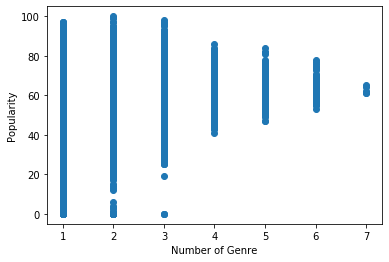

In [95]:
#wanted to know how many tracks had 2 genre in a popularity range of 90-100, how many had 3, 4 etc. 
#but need to do two bins? So I did scatter plot to help see if there's any correlation between the number 
#of genre's a song is in vs popularity. 
plt.scatter(x=genre_counts_df['genre'], y=genre_counts_df['popularity'])
plt.show
plt.ylabel("Popularity")
plt.xlabel("Number of Genre");